## <p style="text-align: right;"> &#9989; Filip Jevtic </p>

# Day 4 In-Class Assignment: Elastic and Viscous Force Models
## With fun debugging practice!

**<p style="text-align: center;"> NOTE: You should work in teams but make sure to turn in today's assignment individually. Also, make sure you don't upload a blank notebook!</p>**

In this notebook, we're going to work with some code that uses functions to apply different forces in both elastic scenarios (think springs) and viscous scenarios (think dashpots... don't know what a dashpot is? You've probably encountered one if you've ever walked through a screen door).  

In the code provided in this assignment, you might run into bugs.  Some of them will be pretty obvious bugs with standard python error outputs, but others might be mistakes in the code. Your job is to fix all errors of all types. Feel to use any of the debugging tips and tricks you learned in the pre-class assignment! 

You'll also have to generate a bit of python code on your own, this will help to brush the cobwebs off with your Python skills.

### Agenda for today's class

1. Review of pre-class assignment
1. Applied Force Models
1. A Simple Spring (Linear Elasticity)
1. Newtonian DashPots (Viscous Model)
1. More Git practice: repository round robin
1. Assignment wrap-up

In [3]:
# We'll start off with importing the things we think we'll need for this assignment.
# It's good to get into the practice of putting all of your important import statements
# In the first code cell in your notebook.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

----
# 1. Review of pre-class assignment

We'll take a few minutes to cover any specific questions you might have about the pre-class assignment.

Let's take a moment to highlight some key concepts. Discuss with your table the following prompts and write down a brief definition of each of these concepts.

* Git review: Discuss what each of the following commands do: git pull, git clone, git add, git commit

&#9989; Do This -  Write your disussion notes here.

* With your table, define the following: Syntax Error, Runtime Error, Logic Error 

&#9989; Do This -  Write your disussion notes here.

* Come up with an example for each of the above errors.

&#9989; Do This -  Write your disussion notes here.


---
# 2. Applied Force Models

In this section we are going to define force models as functions.  Each function has two possible inputs. t is the current time and T is the total time.  The function returns a force based on the current and overall time (T).  

### Constant force
Here is a simple constant force model (think gravity) with a bug. **Note:** this function does not actually change with t or T.  They are included for compatibility later.


In [4]:
def Constant_Force(t, T = 1):
    '''Function returns a constant gravitational force'''
    return(9.8)

&#9989; Do This: Fix the bug in the above code.

### Functions as variables
In Python, functions can be passed around just like variables can(everything is an object). That means that I can actually write a function that can take *another function* as an input. Take a look at the follow bit of example to code to see this in practice. Make sure you understand how the `do_math` function is taking in either the `compute_sum` function or the `compute_average` function to compute a result given a set of input values.

In [ ]:
def compute_sum(values):
    total = 0.0
    for value in values:
        total += value
    print("The sum is:", total)
    return total

def compute_average(values):
    total = 0.0
    for value in values:
        total += value
    average = total/len(values)
    print("The average is:", average)
    return average

def do_math(values, math_function):
    result = math_function(values)
    return result

x = [2,4,7,9]

total = do_math(x, compute_sum)
average = do_math(x, compute_average)
print(total)
print(average)

**Now**, lets define a function called ```plotForce``` which takes a Force Function as an input, like the `Constant_Force` one above, and plots the output.  

A couple of notes:
1. The defaults are included for the Time interval, T, and number of iterations, N, in case we want to change these later.
2. The function also returns the outputs ```TimePoints``` and ```ForceArray``` (because we'll need these later).  

In [5]:
def plotForce(F, T = 1, N = 200, plot=True):
    '''Function to calculate the force function F over time T with N samples. 
    The function will also plot the force vs time as long as the plot variable is true'''
    
    # time-step
    dt = T/N
    TimePoints = np.arange(0, T+dt, dt)

    # generating an array of Force at the time-points
    ForceArray = np.zeros(N+1)

    for i in range(0, N+1):
        time = i*dt
        ForceArray[i] = F(time, T)

    if plot:
        plt.plot(TimePoints, ForceArray, label = "Applied External Force")
        plt.xlabel('time')
        plt.ylabel('Force')
        plt.grid(True)
        plt.legend()
    return TimePoints, ForceArray

&#9989; Do This: Fix the bug in the above code.

Now lets call the ```plotForce ``` function using the ```Constant_Force``` function:

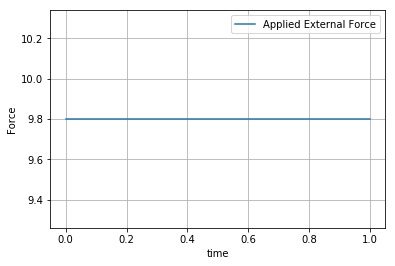

In [6]:
plotForce(Constant_Force);

### Sine Force
Now we can create a different force function. This one is a simple force function based on a sine wave.  The force starts at zero, increases to one in the middle of the time interval and then drops back to zero

In [13]:
import math
def Sin_Force(t, T = 1):
    '''Returns the force over an interval T such that, 
    he force starts at zero, increases to one in the middle of the Time Interval 
    and then drops back to zero'''
    return math.sin(math.pi*t)

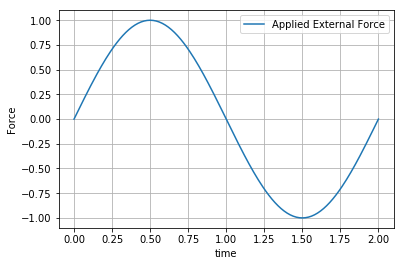

In [14]:
plotForce(Sin_Force, T=2);

&#9989; Do This: Fix the bug in the above code.

### Step Force
Finally we create a third simple Step Force function that starts at force =1 and halfway though the Time interval drops to zero

In [15]:

def Step_Force(t, T = 1):
    '''Returns the force over an interval T such that, 
    starts at force = 1 and halfway though the Time 
    Changes abbruptly to zero'''
    if t < T/2:
        return 1
    if t >= T/2:
        return 0

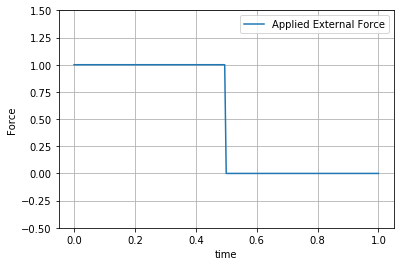

In [17]:
plt.ylim(-0.5,1.5)
plotForce(Step_Force);

Although there is no error message. There is still a bug in this function. Please answer the following questions.

**Question:** What is the behavior that we think is the bug?

<font size=8 color="#009600">&#9998;</font> The force continues to be at one where it should be zero after half the time is up.

**Question:** Where is the bug occurring?

<font size=8 color="#009600">&#9998;</font> Line 9

**Question:** What is causing the bug?  

<font size=8 color="#009600">&#9998;</font> Wrong value being returned.

**Question:** How do you fix the bug? 

<font size=8 color="#009600">&#9998;</font>Replace the 1 with a 0.

&#9989;**Do This:** Fix the bug in the above code.

&#9989; **Do This:**  Modify the above plot to change show the y-axis between -0.5 and 1.5.  This will make the step function easier to see.

### Linear Force
&#9989; **Do This:**  Create your own Force function (called ```Linear_Force```) which starts at zero (0) and increases linearly one over the entire time interval and is one (1) when $t = T$.  

In [20]:
# Put your code here
def Linear_Force(t,T=1):
    if t <= T:
        return 0.2*t

**Once you finish your function**, test the following code:

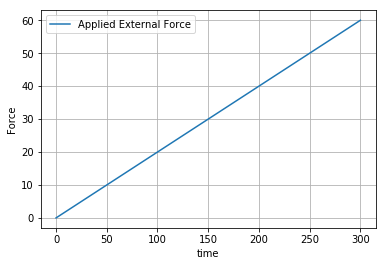

In [21]:
plotForce(Linear_Force, 300);

-----
# 3. A Simple Spring (Linear Elasticity)

<img src="http://homepage.ufp.pt/biblioteca/WebBasPrinTectonics/images/Fig.005d-MechanicalAnalog.jpg" width=300pm height=300>

For small deformations, most elastic materials such as springs exhibit "linear elasticity" and can be described by a linear relation between the exerted force and the resulting displacement. This relationship is known as **Hooke's law**. This law can be stated as a relationship between tensile/compressive force  **_F_** and corresponding extension/compression displacement _**x**_:

$$F = K~x $$

where _**K**_ is a **physical constant** known as the rate or spring constant (the bigger K the stiffer the spring would be). The force _**F**_ can be either constant or time-dependent (i.e., F=F(t)). Then, the displacement x will be accordingly time-dependent as before x(t). 

Hooke's law is a simple law to model the elastic behavior of materials. Solving for x we get:

$$X = \frac{F}{K}$$

or

$$X(t) = \frac{F(t)}{K}$$

In [22]:
def Spring_Displacement(F, K, T, N):
    '''Function to calculate the spring displacement X(t) = 1/K * F(t,T)
    for a spring with spring constant K; over time interval T with N samples 
    and the input force function F(t,T)'''
    X = np.zeros(N+1)
    dt = T/N
    for i in range(0,N+1):
        time = i*dt
        X[i] = F(time, T)/K
    return X 

Now lets plot the Force and Displacement of a spring over a time time interval of 2 and 200 timesteps using the Sin_Force function:

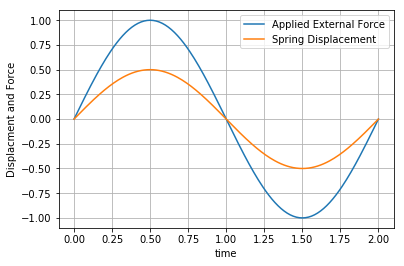

In [23]:
T=2 #Time interval
N = 200 #number of time steps
Force = Sin_Force #Pick which force function to use

#Calculate the forces using the force function (Plot the results)
TimePoints, ForceArray = plotForce(Force, T, N, plot=True)

# Initialize model inputs
K=2 #Spring Constant

# solve the problem and save the results in Xs (of size N+1)
Xs = Spring_Displacement(Force, K, T, N)

# Plot X and F Versus Time, On toop of the pplied External Force.
plt.plot(TimePoints, Xs, label = "Spring Displacement")
plt.legend()
plt.xlabel('time')
plt.ylabel('Displacment and Force')
plt.grid(True)

### Plot results

The following code creates a list of force functions and loops over that list to create four different plots using the **```subplots```** function.  

You can find lots of examples of **```subplots```** here:

http://matplotlib.org/examples/pylab_examples/subplots_demo.html

Basically the function creates a grid of plots instead of just one plot and there's a good change you've seen this function before. The main difference to the code below is that we substituted `plt` with `figax[i]` to tell the program which of the subplots we want our plot function to "draw" on.  The `figax` list allows us to refer to each of the subplots individually.  

However, there is a bug in this code.  It seems to plot the "Spring Displacement" just fine but all four of the applied external forces are plotted on the last plot (instead of being distributed between the four plots). 

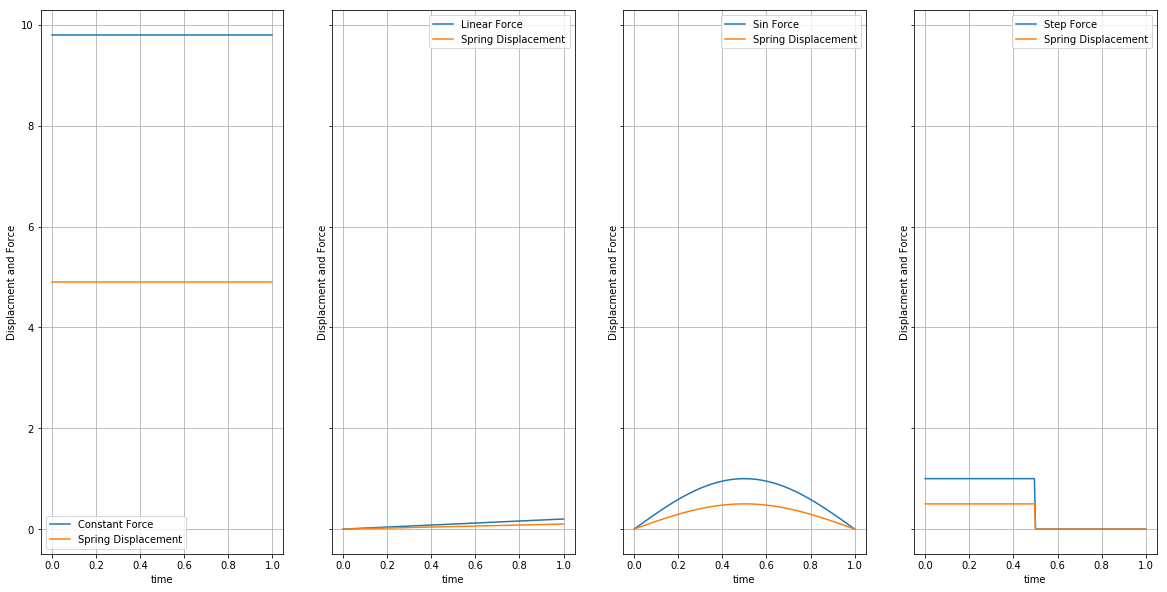

In [33]:
# Create a force list of the four force functions and plot the applied 
# external force and displacment for each function.

forces = [ Constant_Force, Linear_Force, Sin_Force, Step_Force]
force_labels = [ "Constant Force" , "Linear Force", "Sin Force", "Step Force"]

fig, figax = plt.subplots(1, 4, figsize=(20, 10), sharey='row')
T = 1
N = 200
K = 2

#Put your code here
for i in range(len(forces)):
    Force = forces[i]
    #Calculate the forces using the force function (Plot the results)
    TimePoints, ForceArray = plotForce(Force, T, N,plot = False)

    # Initialize model inputs
    K=2 #Spring Constant

    # solve the problem and save the results in Xs (of size N+1)
    Xs = Spring_Displacement(Force, K, T, N)

    # Plot X and F Versus Time, On top of the applied External Force.
    figax[i].plot(TimePoints,ForceArray,label = force_labels[i])
    figax[i].plot(TimePoints, Xs, label = "Spring Displacement")
    figax[i].legend()
    figax[i].set_xlabel('time') #note the name change in this function
    figax[i].set_ylabel('Displacment and Force')    #note the name change in this function
    figax[i].grid(True)

&#9989; **Do This:** Fix the bug in the above code.

----

# 4. Newtonian DashPots (Viscous Model)

[A Newtonian Dashpot](https://en.wikipedia.org/wiki/Dashpot)


<img src="http://pocketdentistry.com/wp-content/uploads/285/f04-08-9781845695293.jpg" width=400px />

Newtonian dashpots are popular models to represent the dissipation and energy loss via viscous mechanism in physical systems. This time, the corresponding (viscous) force F in a Newtonian dashpot is modeled again **linearly** with respect to displacement X as

\begin{equation}
F =  C \frac{dx}{dt}
\end{equation}

where $\frac{dx}{dt}$ denotes the first derivative of the displacement X with respect to time $t$, $C$ represents a **physical constant** (assumed to be constant in an ideal case), and is related to the **viscosity** of the fluid. You can see that the bigger $C$ the bigger the resisting viscous force!     


**Review:** Suppose that F(t) is given function where t is between 0 and some final time T. In order to numerically solve for the displacement $X(t)$ we employ the following finite-difference scheme on a time-grid $t = i\Delta t, \quad \Delta t = T/K$, where $N$ represents the total number of time-steps, and $\Delta t$ is the small time-interval between the two time-steps $t-1$ and $t$:

\begin{equation}
C \frac{dX}{dt} \approx C \frac{X(t) - X(t-1)}{\Delta t} = F(t)  \quad
\end{equation}

Otherwords:


\begin{equation}
X(t) = \frac{\Delta t}{C}F(t) + X(t-1) \quad
\end{equation}

in which $F(t)$ is the evaluation of the forcing function $F$ at time $t$. 

We can then write a function for this force and plot it:

In [34]:
def Viscous_Displacement(C,F,x0,N,T):
    '''Function to calculate the Viscous displacement for a dashpot
    with Viscosity C; starting at location x0; over time interval T with N samples 
    and the input force function F(t,T)'''
    x = np.zeros(N+1)
    dt = T/N #change in time
    x[0] = x0
    for i in range(1,N+1):
        time = i*dt
        x[i] = (dt/C)*F(time, T)+x[i-1]  
    return x 

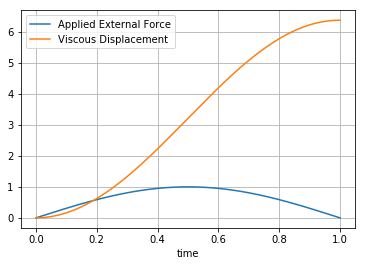

In [35]:
#Force Inputs
T=1
N = 200
Force = Sin_Force

TimePoints, ForceArray = plotForce(Force, T, N, plot=False)

# Initialize the inputs
C=1/10   

# solve the problem and save the results in Xs (of size N+1)
Xv = Viscous_Displacement(C,Force,0,N,T)

# X and F Versus Time
plt.plot(TimePoints, ForceArray, label = "Applied External Force")
plt.plot(TimePoints, Xv, label = "Viscous Displacement")
plt.legend()
plt.xlabel('time')
plt.grid(True)

&#9989; **Do This:**  Plot all four different Force models (Constant, linear, Sin and Step).  Show the graphs below. 

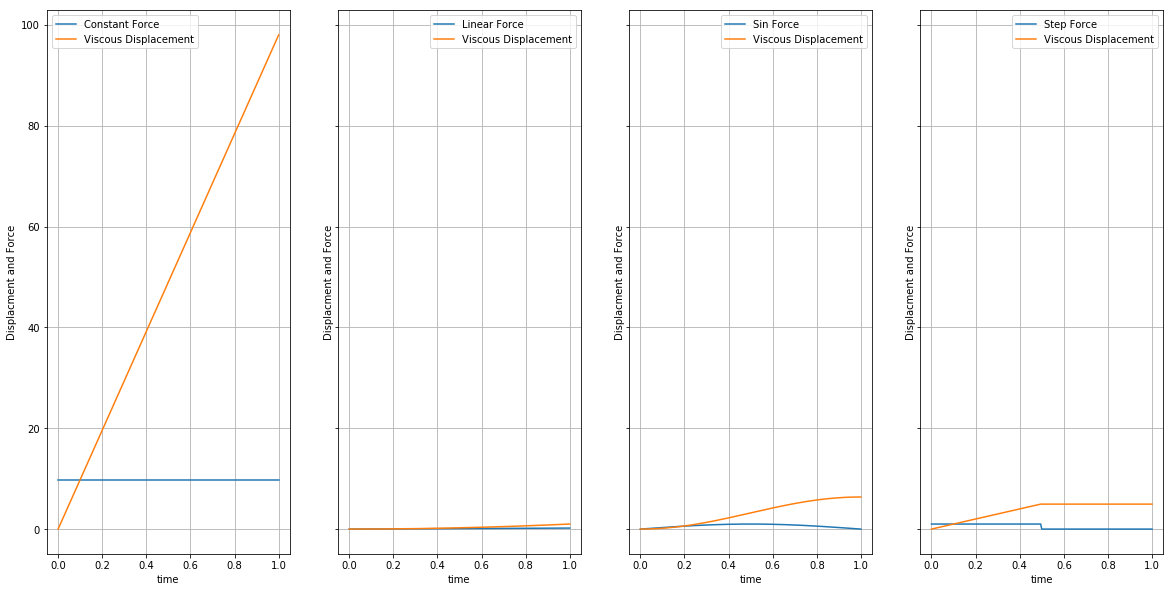

In [39]:
# Put your code here
forces = [ Constant_Force, Linear_Force, Sin_Force, Step_Force]
force_labels = [ "Constant Force" , "Linear Force", "Sin Force", "Step Force"]

fig, figax = plt.subplots(1, 4, figsize=(20, 10), sharey='row')
T = 1
N = 200
K = 2

#Put your code here
for i in range(len(forces)):
    Force = forces[i]
    #Calculate the forces using the force function (Plot the results)
    TimePoints, ForceArray = plotForce(Force, T, N,plot = False)

    # Initialize model inputs
    C = 1/10

    # solve the problem and save the results in Xs (of size N+1)
    Xv =  Viscous_Displacement(C,Force,0,N,T)

    # Plot X and F Versus Time, On top of the applied External Force.
    figax[i].plot(TimePoints,ForceArray,label = force_labels[i])
    figax[i].plot(TimePoints, Xv, label = "Viscous Displacement")
    figax[i].legend()
    figax[i].set_xlabel('time') #note the name change in this function
    figax[i].set_ylabel('Displacment and Force')    #note the name change in this function
    figax[i].grid(True)

----
# 5. More Git practice: Git repository "Round Robin"
**If time allows**, work through this activity. In this activity you'll be continuing to play around with Git and to get some practice for future homeworks.

**Step 1:** Go to [http://github.com/]() individually create a git repository.  Call this repository USERNAME_git_test where USERNAME is your MSUNetID. **Important**: if you haven't gained access to the GitHub [Student Pack](https://education.github.com/pack) yet, make sure to submit that request now.

<font size=6 color="#009600">&#9998;</font> Note any problems you had with the above step (or any questions) here.

**Step 2:** Clone the repository into your CMSE202/repositories directory. The repository is probably still empty so you will get a warning.

<font size=6 color="#009600">&#9998;</font> Note any problems you had with the above step (or any questions) here.

**Step 3:** Create a new text file (Name the file README.md or README.txt) inside of the repository folder. Include the following information in the readme file:

* Name
* Email Address
* What is your major? 
* What year are you in School?
* Where are you from?
* What is your programming background?


<font size=6 color="#009600">&#9998;</font> Note any problems you had with the above step (or any questions) here.

**Step 4:** Add and commit the change to your repository.  Make sure you push the change to the central repository. 

<font size=6 color="#009600">&#9998;</font> Note any problems you had with the above step (or any questions) here.

**Step 5:** Check the website and make sure you see the file and can access it. 

<font size=6 color="#009600">&#9998;</font> Note any problems you had with the above step (or any questions) here.

**Step 6:** Add 2 of your groupmates and the instructors to the project using the web interface. To do this, go to the repository settings tab and look for the section labeled "Collaborators & teams". Make sure that each collaborator has "Write" access.

<font size=6 color="#009600">&#9998;</font> Note any problems you had with the above step (or any questions) here.

**Step 7:** Have you groupmates clone your repository and clone the repositories that you've been added to.

<font size=6 color="#009600">&#9998;</font> Note any problems you had with the above step (or any questions) here.

**Step 8:** Add your name and email address to the next available line in the README file for each of your groupmates repositories. 

<font size=6 color="#009600">&#9998;</font> Note any problems you had with the above step (or any questions) here.

**Step 9:** Add and Commit your change to the server.  NOTE: this step may be tricky if more then one member of the group tries to change the same file at the same time.  This happens often when working with Git repositories! Your job is to manage the file conflicts.

<font size=6 color="#009600">&#9998;</font> Note any problems you had with the above step (or any questions). Here.

**Step 10:** Do a git pull for all of your repositories.  If done correctly, each repository will have the names and emails for all of the team members in the README file.  

<font size=6 color="#009600">&#9998;</font> Note any problems you had with the above step (or any questions). Here.

**Question:** What command(s) should the instructor use to download your group repositories? 

<font size=8 color="#009600">&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

---

---------
### Congratulations, you're done with your in-class assignment!

Now, you just need to submit this assignment by uploading it to the course Desire2Learn web page (Don't forget to add your name in the first cell). 

&#169; Copyright 2016,  Michigan State University Board of Trustees